In [108]:
import csv
import pandas as pd
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import statsmodels.api as sm

In [138]:
Arrival_time_weekdays=pd.read_excel('Arrival_time_weekdays.xls') #distribution-of-arrival-time-on-weekdays
Connection_times=pd.read_excel('Connection_times.xls')# distribution of connection time (duration of charging events) for each location type.
Arrival_time_weekends=pd.read_excel('Arrival_time_weekends.xls') #distribution-of-arrival-time-on-weekends (2)
Percentage_charging_events=pd.read_excel('Percentage_charging_events.xls')#The number of battery-electric vehicles (BEVs) is increasing rapidly in the Netherlands. Currently, there are about 36.000 BEVs on the Dutch roads. Since 2018 we see that the share of BEVs is gaining ground in the total EV fleet (including the plug-in hybrids) of the country.
Energy_demand_dist=pd.read_excel('Energy_demand_dist.xls')#distribution of energy demand per charging event at each location type.
SampleChargingProfiles=pd.read_excel('SampleChargingProfiles (1).xlsx')
transactions = pd.read_csv('transactions_2018 (1).csv')


In [184]:
SampleChargingProfiles.corr()


,TransactionID,MeterStart,MeterStop,ConnectedTime,ChargeTime,TotalEnergy,MaxPower,IdleTime
TransactionID,1.000000,0.107401,0.107312,-0.023190,-0.040403,-0.034917,-0.066585,-0.011710
MeterStart,0.107401,1.000000,0.999998,0.107289,0.094836,0.131076,0.157934,0.091092
MeterStop,0.107312,0.999998,1.000000,0.108311,0.096552,0.132864,0.158267,0.091633
ConnectedTime,-0.023190,0.107289,0.108311,1.000000,0.630977,0.575526,0.099978,0.950419
ChargeTime,-0.040403,0.094836,0.096552,0.630977,1.000000,0.955536,0.087183,0.358440
TotalEnergy,-0.034917,0.131076,0.132864,0.575526,0.955536,1.000000,0.203531,0.309536
MaxPower,-0.066585,0.157934,0.158267,0.099978,0.087183,0.203531,1.000000,0.085361
IdleTime,-0.011710,0.091092,0.091633,0.950419,0.358440,0.309536,0.085361,1.000000


In [185]:
# transactions.head()
#create scatter plot of arrival and departure
# is there a correlation between charging power and connection time?
SampleChargingProfiles['IdleTime']=SampleChargingProfiles.ConnectedTime-SampleChargingProfiles.ChargeTime
SampleChargingProfiles.head()

,TransactionID,ChargePointID,ConnectorID,Started,Ended,MeterStart,MeterStop,ConnectedTime,ChargeTime,TotalEnergy,MaxPower,IdleTime
0,2826872,CP_407,CP_407_S2,2017-12-01 12:23:09,2017-12-01 13:46:28,2610770,2621940,1.3886,1.2744,11.170,10.400,0.1142
1,2728411,CP_448,CP_448_S1,2017-09-30 16:25:06,2017-10-01 07:51:35,24475230,24529170,15.4414,5.4517,53.940,10.391,9.9897
2,2288257,CP_77,CP_77_S1,2017-03-31 18:24:57,2017-03-31 20:18:24,2882159,2904030,1.8908,1.7500,21.871,13.080,0.1408
3,2598513,CP_68,CP_68_S1,2017-07-08 16:23:13,2017-07-08 18:45:30,1941479,1965369,2.3714,2.3706,23.890,10.760,0.0008
4,2851070,CP_200,CP_200_S2,2017-12-18 16:33:42,2017-12-18 19:11:45,5815080,5827189,2.6342,2.1339,12.109,10.440,0.5003


In [169]:
transactions.head()

,Unnamed: 0,StartCard,Connector,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,ChargePoint
0,1,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-03-23 12:19:52,2011-03-23 12:30:43,1000,0.1808,0.1808,5921,baae5214395f7471f04897d19d757d13
1,2,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-04-13 14:52:52,2011-04-13 16:35:17,8000,1.7069,1.6189,8411,baae5214395f7471f04897d19d757d13
2,3,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-05-05 14:41:54,2011-05-05 14:48:12,1000,0.1050,0.0533,18750,baae5214395f7471f04897d19d757d13
3,4,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-05-30 13:43:00,2011-05-30 15:23:48,5000,1.6800,1.1467,6818,baae5214395f7471f04897d19d757d13
4,5,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-06-18 13:36:55,2011-06-18 17:15:10,12000,3.6375,2.8875,7423,bdc90ef4f996f04fdde155353a441848


In [177]:
#Model1
X=SampleChargingProfiles.loc[:,['ChargeTime','TotalEnergy','MaxPower']].values
Y=SampleChargingProfiles.loc[:,'ConnectedTime'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [175]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions
print('Intercept: \n', linear_regressor.intercept_)
print('Coefficients: \n', linear_regressor.coef_)

# regressor = LinearRegression()  
# regressor.fit(X_train, y_train)

Intercept: 
 -4.844939511614882
Coefficients: 
 [ 2.10969178 -0.13336221  0.47125659]


In [176]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, Y_pred))

Mean squared error: 19.82


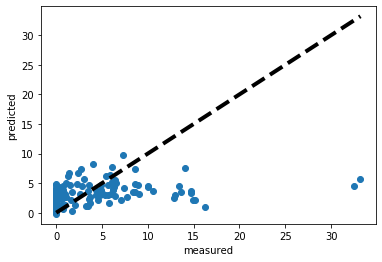

In [173]:
fig, ax = plt.subplots()
ax.scatter(y_test, Y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [ ]:

regr = linear_model.LinearRegression()
linear_regressor.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


In [110]:
transactions.head() #2011-2016 

,Unnamed: 0,StartCard,Connector,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,ChargePoint
0,1,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-03-23 12:19:52,2011-03-23 12:30:43,1000,0.1808,0.1808,5921,baae5214395f7471f04897d19d757d13
1,2,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-04-13 14:52:52,2011-04-13 16:35:17,8000,1.7069,1.6189,8411,baae5214395f7471f04897d19d757d13
2,3,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-05-05 14:41:54,2011-05-05 14:48:12,1000,0.1050,0.0533,18750,baae5214395f7471f04897d19d757d13
3,4,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-05-30 13:43:00,2011-05-30 15:23:48,5000,1.6800,1.1467,6818,baae5214395f7471f04897d19d757d13
4,5,002e3af5b21e55b30385211c7687c084491727673ed923...,2,2011-06-18 13:36:55,2011-06-18 17:15:10,12000,3.6375,2.8875,7423,bdc90ef4f996f04fdde155353a441848


In [ ]:
#prediction of availability and  charging rate at charging stations for electric vehicles
#using time series

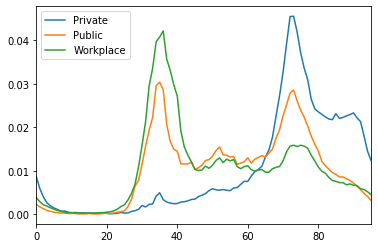

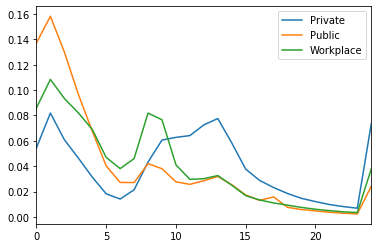

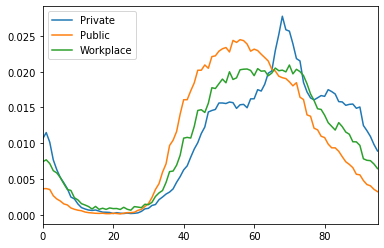

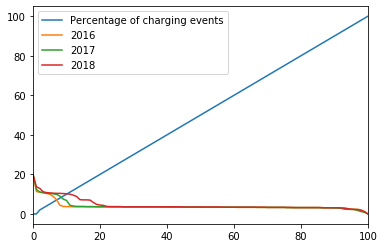

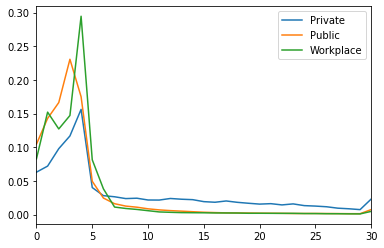

In [187]:
Arrival_time_weekdays.plot() #distribution-of-arrival-time-on-weekdays
Connection_times.plot()
Arrival_time_weekends.plot()
Percentage_charging_events.plot()
Energy_demand_dist.plot()

In [ ]:
#For each typical location charging points (private, workplace and public)
#we have generated normalized profiles based on large volumes of real charging data (more than 6M in total).

In [ ]:
plt.scatter(Arrival_time_weekends['Arrival time'].values,Arrival_time_weekends[['Public']].values,label='Public')
plt.scatter(Arrival_time_weekends['Arrival time'].values,Arrival_time_weekends[['Private']].values,label='Private')
plt.scatter(Arrival_time_weekends['Arrival time'].values,Arrival_time_weekends[['Workplace']].values, label='Workplace')
plt.legend(loc='upper left');
plt.ylim(0,0.05)


In [ ]:
#spatial and temporal behavior
#behavioral change in the market
# 

In [ ]:
#typical behaviors in terms of
#arrival and departure times in the dataset
#The time of day when EV drivers plug in to charge, and the amount of energy they consume, (how long they charge for), is vitally important to understanding EV charging load diversity.



(0, 0.05)

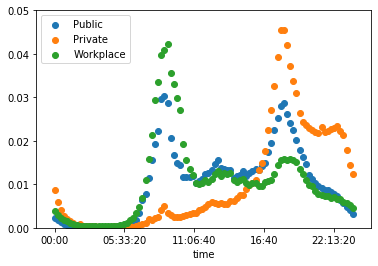

In [7]:

plt.scatter(Connection_times['Arrival time'].values,Arrival_time_weekdays[['Public']].values,label='Public')
plt.scatter(Connection_times['Arrival time'].values,Arrival_time_weekdays[['Private']].values,label='Private')
plt.scatter(Connection_times['Arrival time'].values,Arrival_time_weekdays[['Workplace']].values, label='Workplace')
plt.legend(loc='upper left');
plt.ylim(0,0.05)

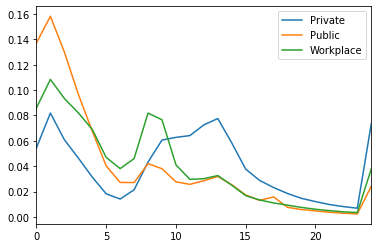

In [186]:
Connection_times.plot()
